# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data Exploration

In [2]:
df = pd.read_csv('assets/Housing.csv')

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.shape

(545, 13)

In [5]:
df.info() # no nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


We can deduce that no null values in the data "No of non-null count in each col = no of rows"

In [6]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
df.nunique().sort_values()

mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
prefarea              2
furnishingstatus      3
bathrooms             4
stories               4
parking               4
bedrooms              6
price               219
area                284
dtype: int64

In [8]:
df.duplicated().sum()

0

# Data Visualization

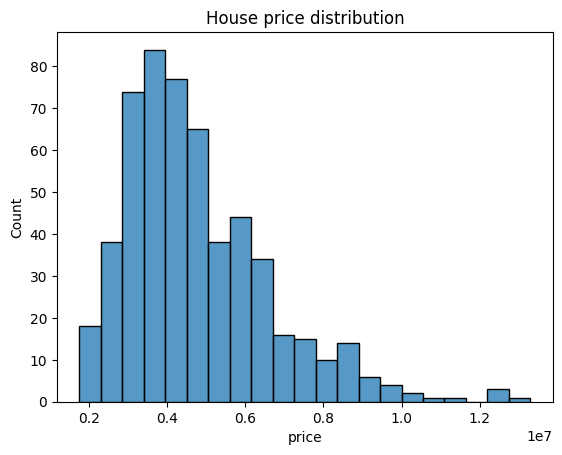

In [9]:
plt.title("House price distribution")
sns.histplot(df, x='price')

plt.show()

The plot of prices looks a lil bit right skewed

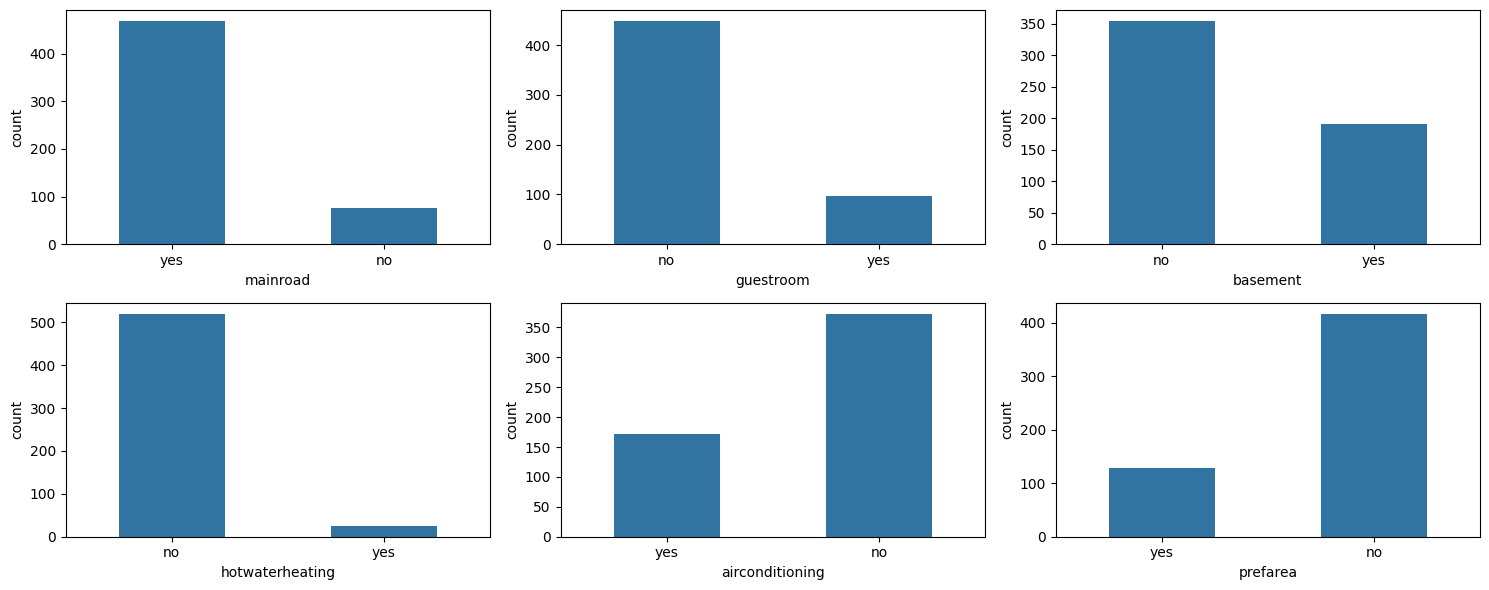

In [10]:
plt.figure(figsize=(15, 6))

plt.subplot(2, 3, 1)
sns.countplot(df, x='mainroad', width=0.5)

plt.subplot(2, 3, 2)
sns.countplot(df, x='guestroom', width=0.5)

plt.subplot(2, 3, 3)
sns.countplot(df, x='basement', width=0.5)

plt.subplot(2, 3, 4)
sns.countplot(df, x='hotwaterheating', width=0.5)

plt.subplot(2, 3, 5)
sns.countplot(df, x='airconditioning', width=0.5)

plt.subplot(2, 3, 6)
sns.countplot(df, x='prefarea', width=0.5)

plt.tight_layout()
plt.show()

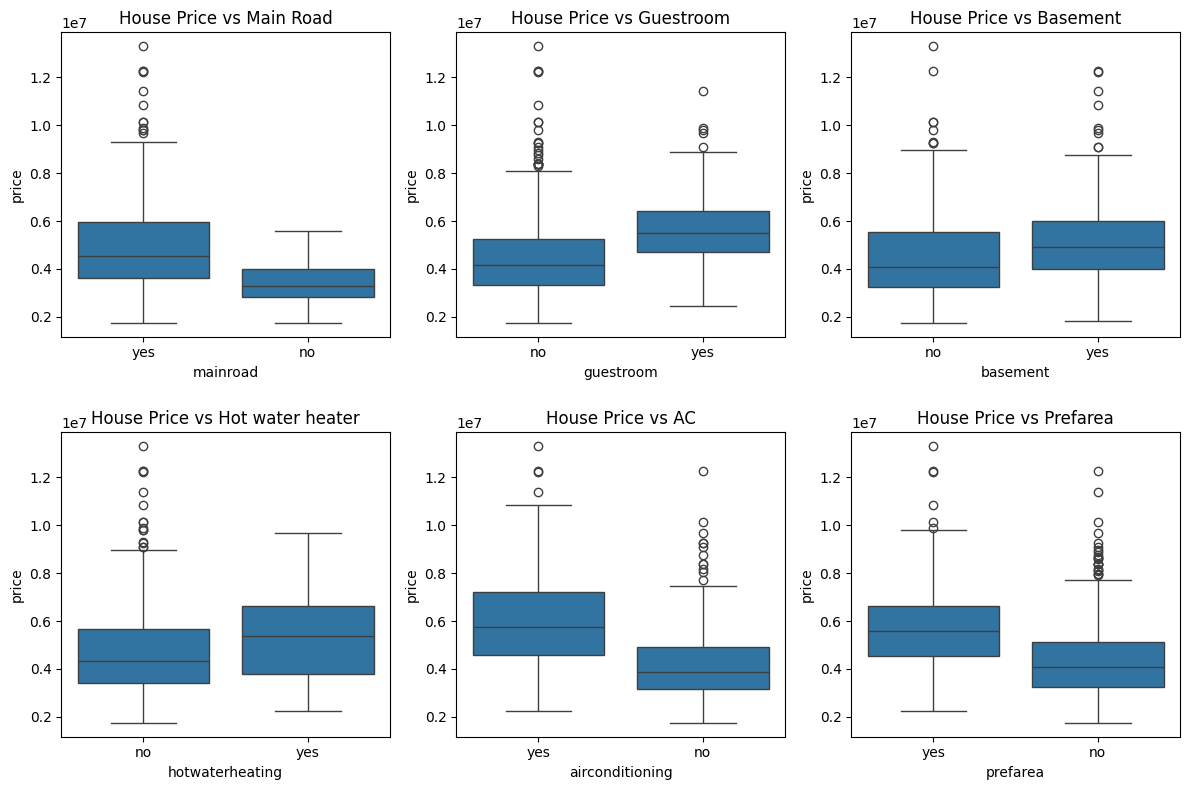

In [11]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
sns.boxplot(df, x='mainroad', y='price')
plt.title('House Price vs Main Road')

plt.subplot(2, 3, 2)
sns.boxplot(df, x='guestroom', y='price')
plt.title('House Price vs Guestroom')

plt.subplot(2, 3, 3)
sns.boxplot(df, x='basement', y='price')
plt.title('House Price vs Basement')

plt.subplot(2, 3, 4)
sns.boxplot(df, x='hotwaterheating', y='price')
plt.title('House Price vs Hot water heater')

plt.subplot(2, 3, 5)
sns.boxplot(df, x='airconditioning', y='price')
plt.title('House Price vs AC')

plt.subplot(2, 3, 6)
sns.boxplot(df, x='prefarea', y='price')
plt.title('House Price vs Prefarea')

plt.tight_layout()
plt.show()

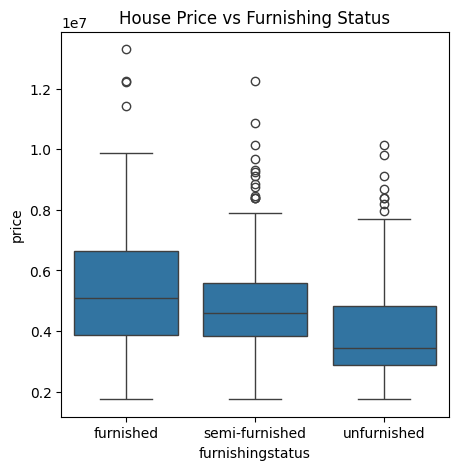

In [12]:
plt.figure(figsize=(5, 5))
sns.boxplot(df, x='furnishingstatus', y='price')
plt.title('House Price vs Furnishing Status')

plt.show()

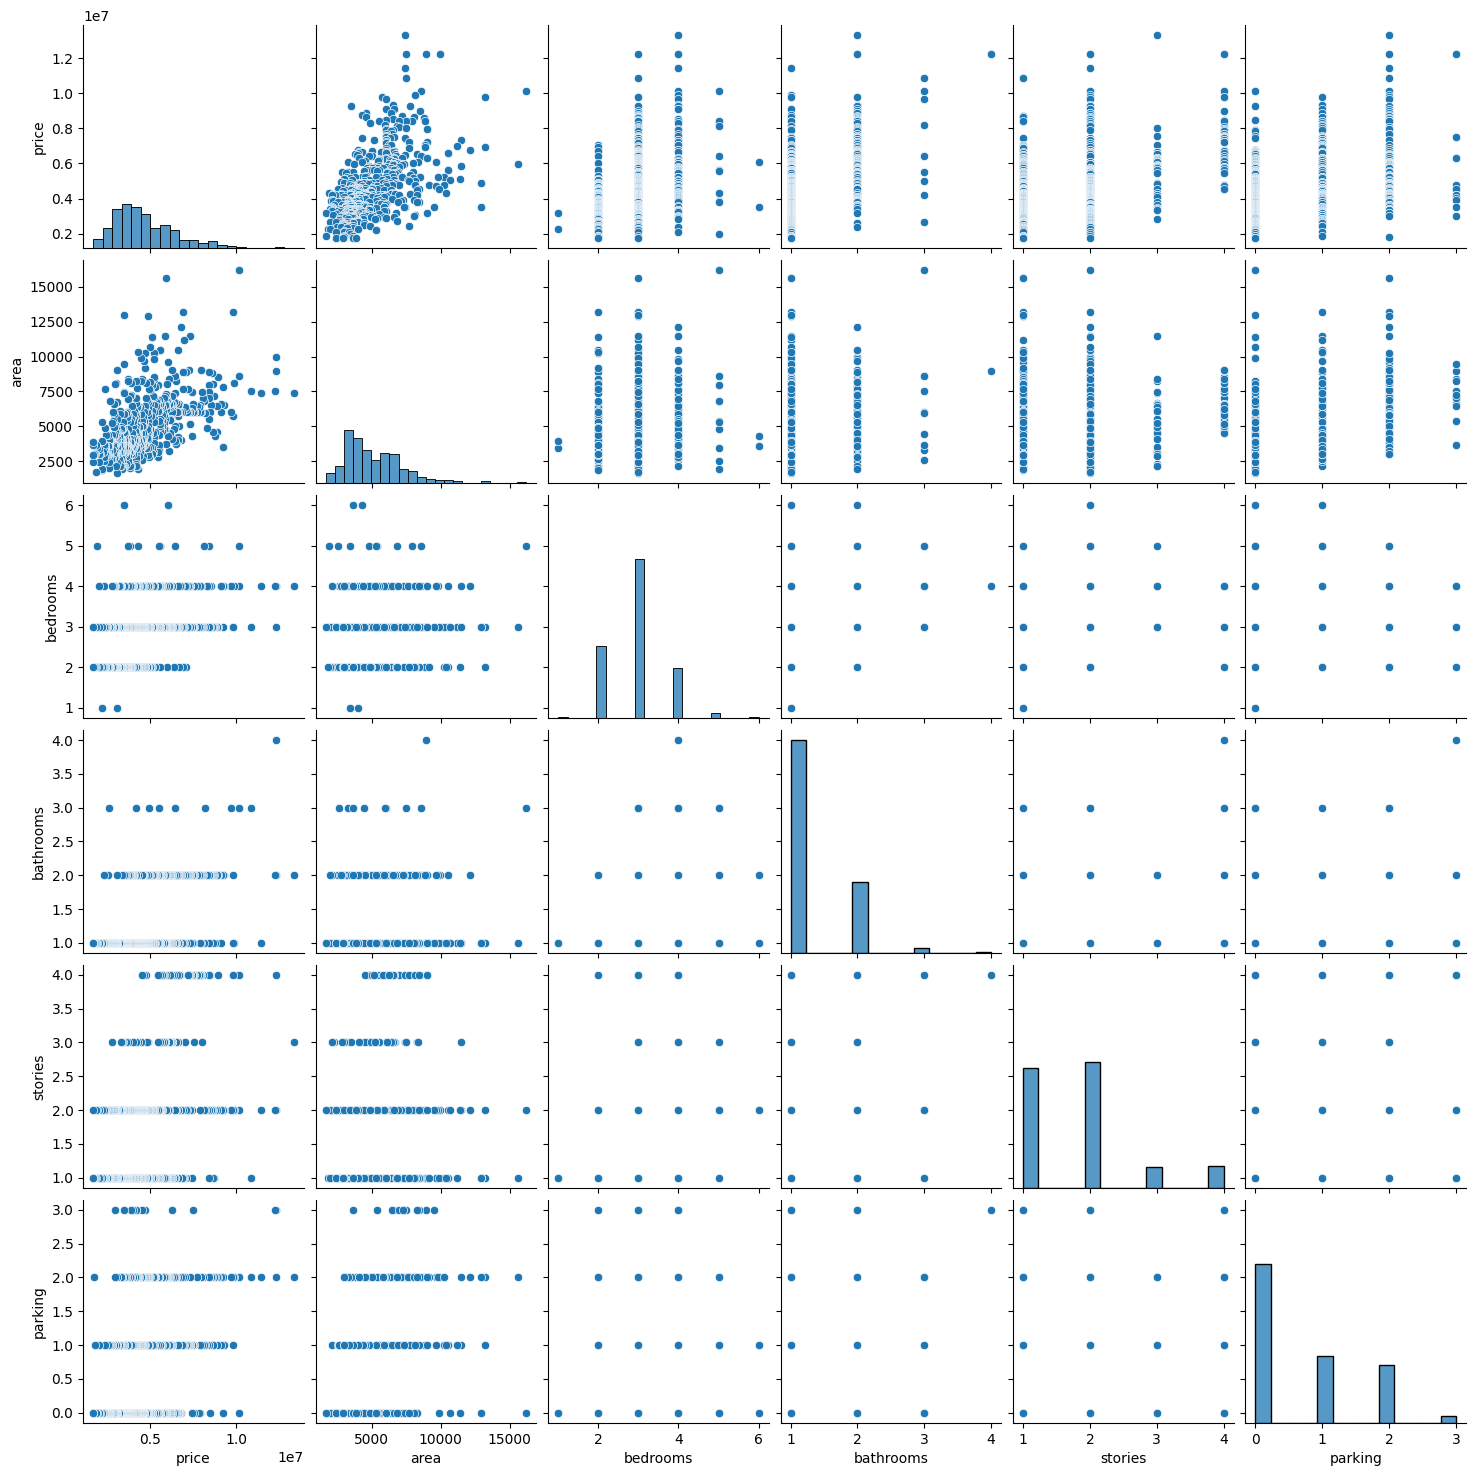

In [13]:
sns.pairplot(df)
plt.show()

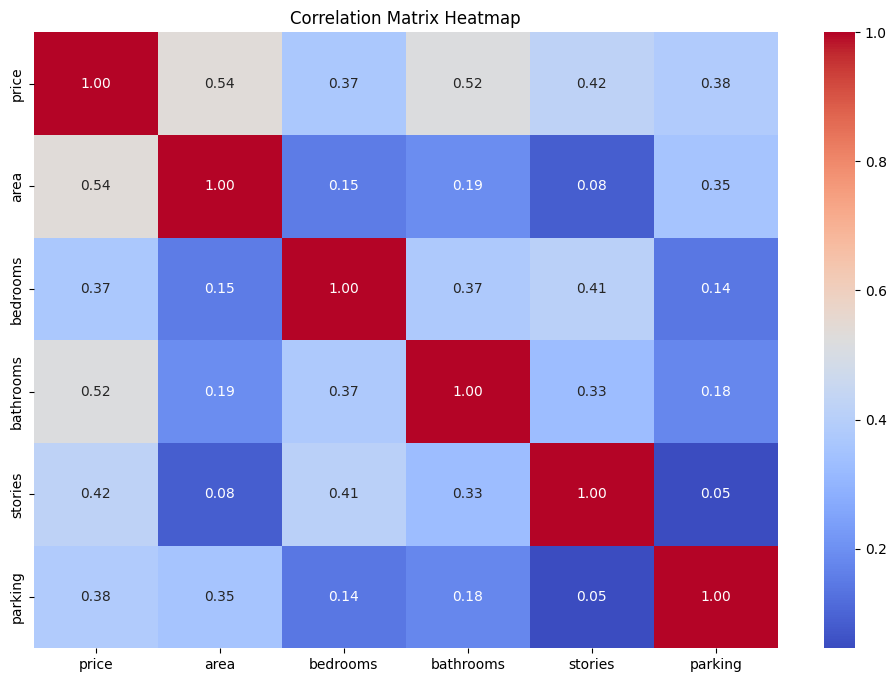

In [14]:
plt.figure(figsize=(12, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# Data Preprocessing

## Encoding

In [15]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [16]:
for col in df[['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']].columns:
    df[col] = df[col].map(lambda x: 1 if x == 'yes' else 0)

In [17]:
df = pd.get_dummies(
    df, columns=['furnishingstatus'], prefix='', prefix_sep='')

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,True,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,True,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,False,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,True,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,True,False,False


In [18]:
df["furnished"] = df["furnished"].astype(int)
df["semi-furnished"] = df["semi-furnished"].astype(int)
df["unfurnished"] = df["unfurnished"].astype(int)

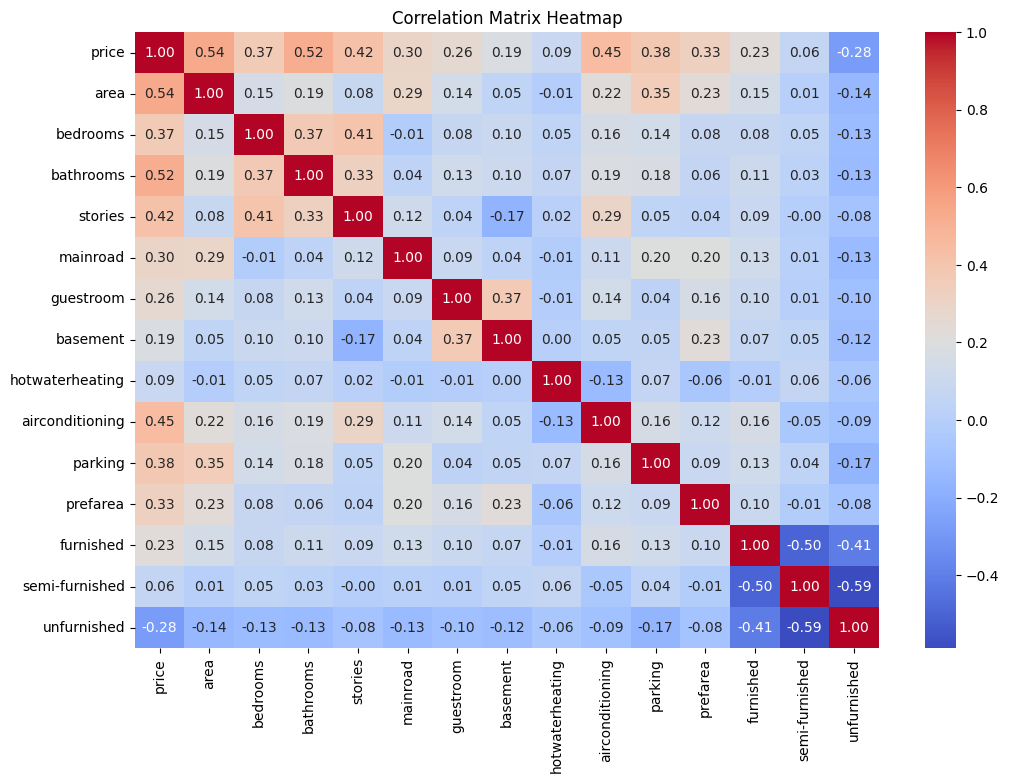

In [19]:
plt.figure(figsize=(12, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

## Feature Engineering

In [ ]:
df['total_rooms'] = df['bedrooms'] + df['bathrooms'] + df['guestroom']

binary_cols = ['guestroom', 'basement', 'mainroad', 'hotwaterheating', 'airconditioning', 'prefarea']
df[binary_cols] = df[binary_cols].astype(int)

df['luxury_features'] = df[binary_cols].sum(axis=1)

df['area_per_story']=df['area']/df['stories']

In [21]:
df['price'] = np.log(df['price']) # to normalize the prices

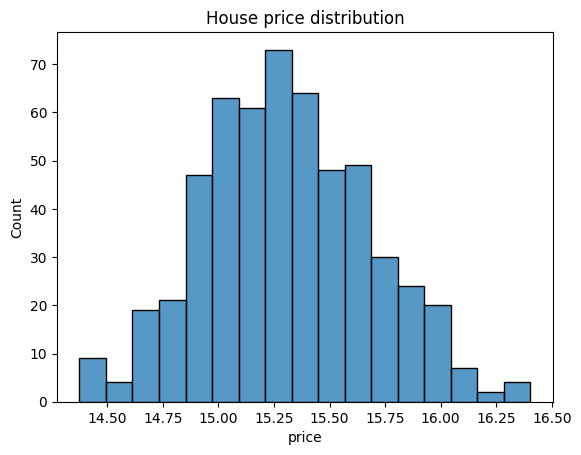

In [22]:
plt.title("House price distribution")
sns.histplot(df, x='price')

plt.show()

In [23]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished,total_rooms,luxury_features,area_per_story
0,16.403275,7420,4,2,3,1,0,0,0,1,2,1,1,0,0,6,3,2473.333333
1,16.321036,8960,4,4,4,1,0,0,0,1,3,0,1,0,0,8,2,2240.000000
2,16.321036,9960,3,2,2,1,0,1,0,0,2,1,0,1,0,5,3,4980.000000
3,16.318175,7500,4,2,2,1,0,1,0,1,3,1,1,0,0,6,4,3750.000000
4,16.250001,7420,4,1,2,1,1,1,0,1,2,0,1,0,0,6,4,3710.000000


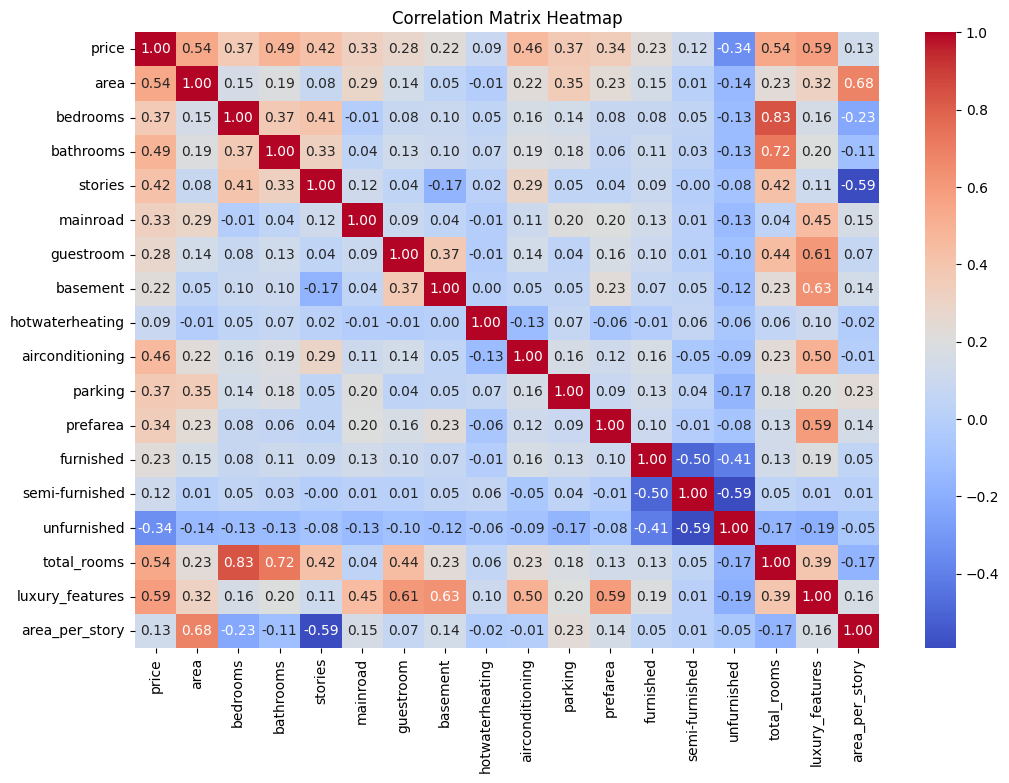

In [24]:
plt.figure(figsize=(12, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [25]:
df.drop(columns=["area_per_story"], inplace=True)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished,total_rooms,luxury_features
0,16.403275,7420,4,2,3,1,0,0,0,1,2,1,1,0,0,6,3
1,16.321036,8960,4,4,4,1,0,0,0,1,3,0,1,0,0,8,2
2,16.321036,9960,3,2,2,1,0,1,0,0,2,1,0,1,0,5,3
3,16.318175,7500,4,2,2,1,0,1,0,1,3,1,1,0,0,6,4
4,16.250001,7420,4,1,2,1,1,1,0,1,2,0,1,0,0,6,4


# Modeling

## Data Manipulation

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
x = df.drop(columns=['price', 'total_rooms', 'luxury_features'])
y = df['price']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [29]:
# Scaling the data into the same range of values

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 1) Multiple linear regression

In [30]:
linearReg = LinearRegression()
linearReg.fit(X_train_scaled, y_train)

LinearRegression()

In [31]:
# Predict on the train and test set
y_train_pred = linearReg.predict(X_train_scaled)
y_pred = linearReg.predict(X_test_scaled)

In [32]:
# Evaluating the model
LinearMSE_train = mean_squared_error(y_train, y_train_pred)
LinearR2_train = r2_score(y_train, y_train_pred)

LinearMSE = mean_squared_error(y_test, y_pred)
LinearR2 = r2_score(y_test, y_pred)

print(f"Train MSE: {LinearMSE_train:.4f}")
print(f"Test MSE: {LinearMSE:.4f}\n")

print(f"Train R^2 Score: {LinearR2_train:.4f}")
print(f"Test R^2 Score: {LinearR2:.4f}")

Train MSE: 0.0368
Test MSE: 0.0633

Train R^2 Score: 0.7039
Test R^2 Score: 0.6722


## 2) Lasso Regression

In [33]:
lassoReg = Lasso()
lassoReg.fit(X_train_scaled, y_train)

Lasso()

In [34]:
# Prediction of the train and test set
yLassoTrainPred = lassoReg.predict(X_train_scaled)
yLassoPred = lassoReg.predict(X_test_scaled)

In [35]:
# Evaluating the model
LassonMSE_train = mean_squared_error(y_train, yLassoTrainPred)
LassoR2_train = r2_score(y_train, yLassoTrainPred)

LassoMSE = mean_squared_error(y_test, yLassoPred)
LassoR2 = r2_score(y_test, yLassoPred)

print(f"Train MSE: {LassonMSE_train:.4f}")
print(f"Test MSE: {LassoMSE:.4f}\n")

print(f"Train R^2 Score: {LassoR2_train:.4f}")
print(f"Test R^2 Score: {LassoR2:.4f}")

Train MSE: 0.1244
Test MSE: 0.1940

Train R^2 Score: 0.0000
Test R^2 Score: -0.0045


## 3) Ridge Regression

In [36]:
ridgeLinearReg = Ridge()
ridgeLinearReg.fit(X_train_scaled, y_train)

Ridge()

In [37]:
# Prediction of the train and test set
yRidgeTrainPred = ridgeLinearReg.predict(X_train_scaled)
yRidgePred = ridgeLinearReg.predict(X_test_scaled)

In [38]:
# Evaluating the model
RidgeMSE_train = mean_squared_error(y_train, yRidgeTrainPred)
RidgeR2_train = r2_score(y_train, yRidgeTrainPred)

RidgeMSE = mean_squared_error(y_test, yRidgePred)
RidgeR2 = r2_score(y_test, yRidgePred)

print(f"Train MSE: {RidgeMSE_train:.4f}")
print(f"Test MSE: {RidgeMSE:.4f}\n")

print(f"Train R^2 Score: {RidgeR2_train:.4f}")
print(f"Test R^2 Score: {RidgeR2:.4f}")

Train MSE: 0.0368
Test MSE: 0.0633

Train R^2 Score: 0.7039
Test R^2 Score: 0.6721


## 4) Polynomial

In [45]:
from sklearn.preprocessing import PolynomialFeatures

trainPolyError=[]
testPolyError=[]
n_degree=7

for i in range(2,n_degree):
    poly_reg = PolynomialFeatures(degree=i)
    X_poly = poly_reg.fit_transform(X_train)
    X_poly1 = poly_reg.transform(X_test)
    linear = LinearRegression()
    linear.fit(X_poly, y_train)
    
    trainPred = linear.predict(X_poly)
    trainPolyError.append(mean_squared_error(y_train, trainPred))
    
    testPred = linear.predict(X_poly1)
    testPolyError.append(mean_squared_error(y_test, testPred))


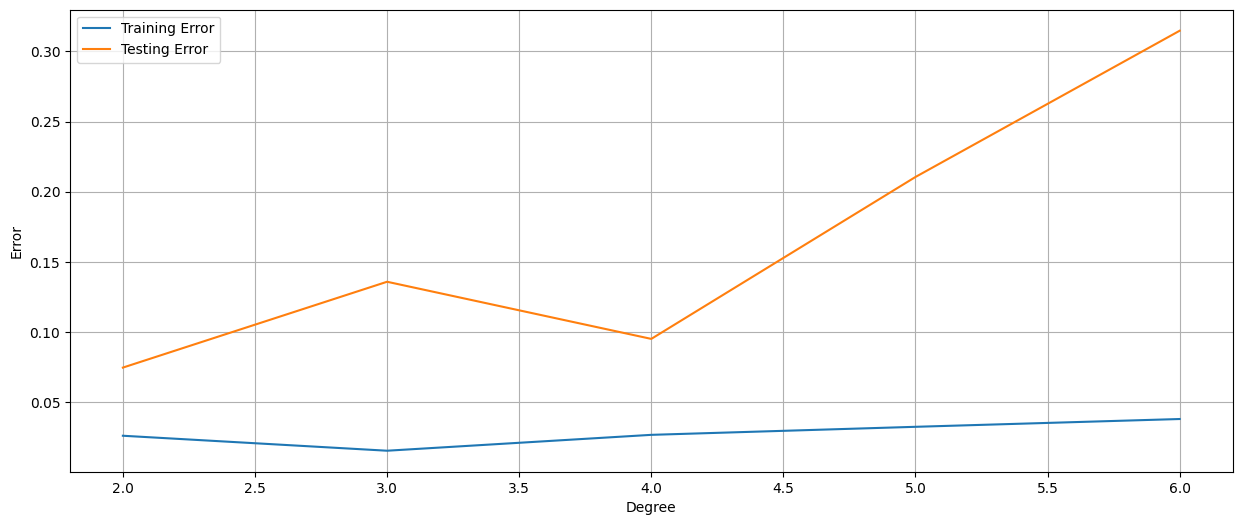

In [46]:
plt.figure(figsize=(15, 6))

plt.plot(range(2, n_degree), trainPolyError, label="Training Error")
plt.plot(range(2, n_degree), testPolyError, label="Testing Error")
plt.xlabel("Degree")
plt.ylabel("Error")
plt.grid()
plt.legend()

plt.show()

2nd degree has the least training and test errors. So, it fits data the most.

In [47]:
# training the 2nd degree model on the data
poly = PolynomialFeatures(degree=2)

X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

linear = LinearRegression()
linear.fit(X_poly_train, y_train)

LinearRegression()

In [48]:
yPolyTrainPred = linear.predict(X_poly_train)
yPolyPred = linear.predict(X_poly_test)

In [ ]:
PolyMSE_train = mean_squared_error(y_train, yPolyTrainPred)
PolyR2_train = r2_score(y_train, yPolyTrainPred)

PolyMSE = mean_squared_error(y_test, yPolyPred)
PolyR2 = r2_score(y_test, yPolyPred)

print(f"Train MSE: {PolyMSE_train:.4f}")
print(f"Test MSE: {PolyMSE:.4f}\n")

print(f"Train R^2 Score: {PolyR2_train:.4f}")
print(f"Test R^2 Score: {PolyR2:.4f}")

Train MSE: 0.0261
Test MSE: 0.0747

Train R^2 Score: 0.7901
Test R^2 Score: 0.6133


## 5) Choosing the best model

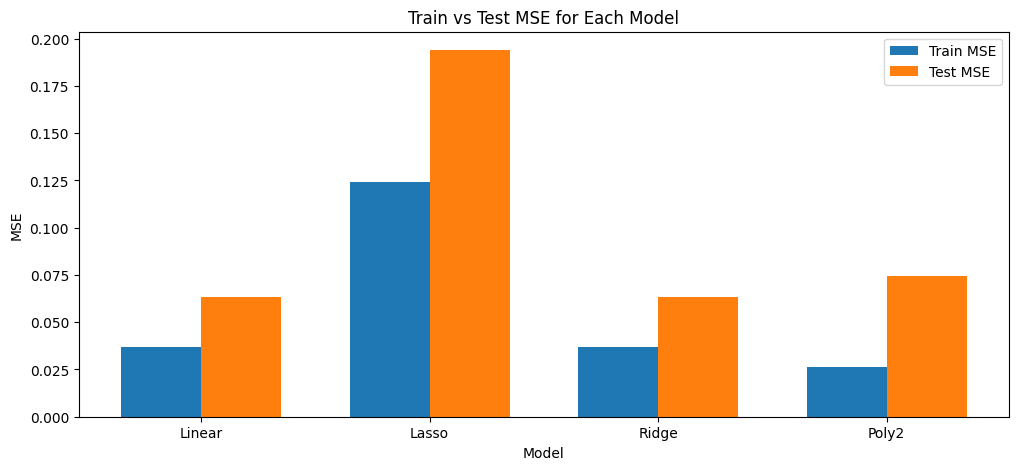

In [51]:
models = ['Linear', 'Lasso', 'Ridge', 'Poly2']

mse_train = [LinearMSE_train, LassonMSE_train, RidgeMSE_train, PolyMSE_train]
mse_test = [LinearMSE, LassoMSE, RidgeMSE, PolyMSE]

plt.figure(figsize=(12, 5))
bar_width = 0.35
index = np.arange(len(models))

plt.bar(index, mse_train, bar_width, label='Train MSE')
plt.bar(index + bar_width, mse_test, bar_width, label='Test MSE')

plt.xlabel('Model')
plt.ylabel('MSE')
plt.title('Train vs Test MSE for Each Model')
plt.xticks(index + bar_width / 2, models)
plt.legend()
plt.show()